In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2, style='whitegrid')
%matplotlib inline

In [2]:
df= pd.read_csv('diamonds.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# we drop these columns because their correlation is above .75. We keep the carat variable
df = df.drop(columns=['x','y','z'])

# Testing Linear Regression Assumptions

## 1. Linearity between X variables and the Y variable (Diamond Price)

### Linearity Carat vs. Price

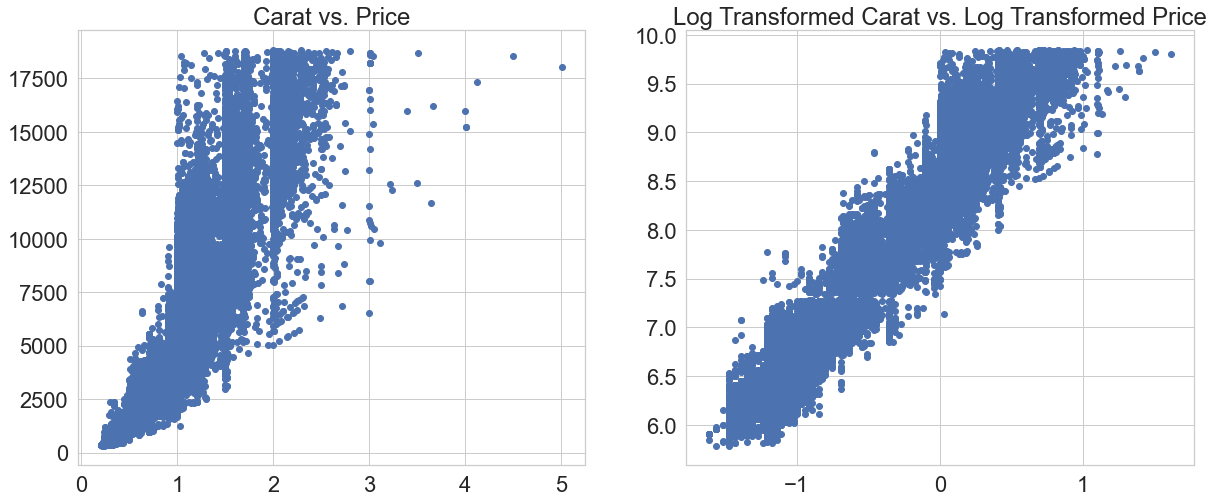

In [4]:


plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Carat vs. Price')
plt.scatter(df.carat, df.price)

plt.subplot(1,2,2)
plt.title('Log Transformed Carat vs. Log Transformed Price')
plt.scatter(np.log(df.carat), np.log(df.price))

plt.show()

### Depth vs. Price

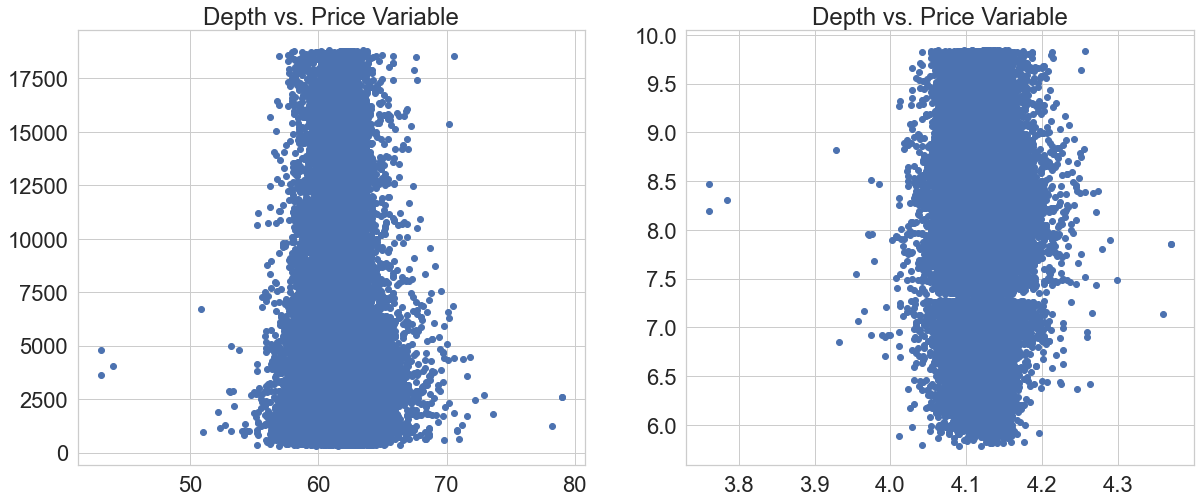

In [5]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Depth vs. Price Variable')
plt.scatter(df.depth, df.price)

plt.subplot(1,2,2)
plt.title('Depth vs. Price Variable')
plt.scatter(np.log(df.depth), np.log(df.price))

plt.show()

Inferences<br>
- there doesn't seem to be any relationship between depth and price because there is no correlation between. A change in depth doesn't signify a change in price.

### Table vs. Price

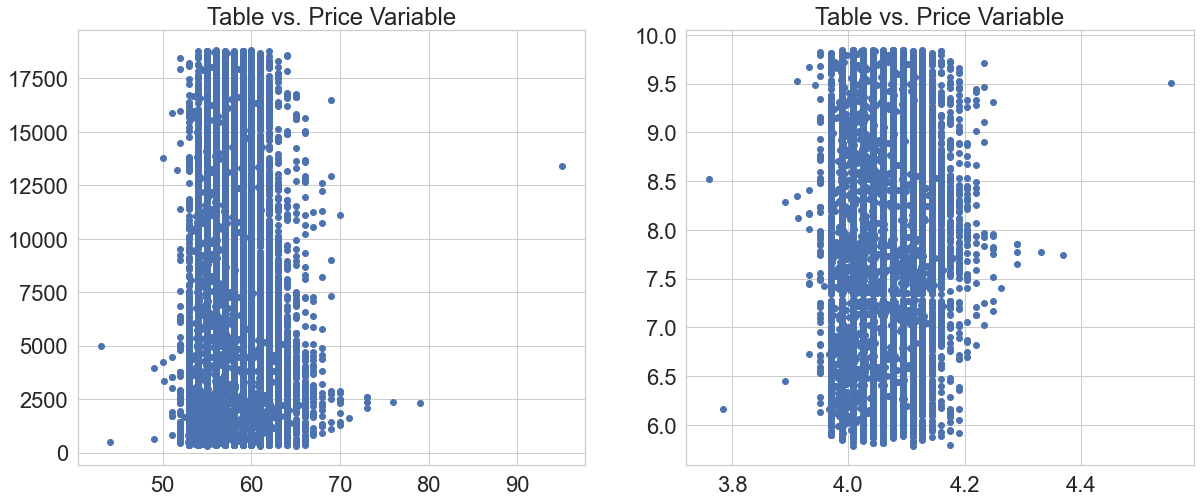

In [6]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Table vs. Price Variable')
plt.scatter(df.table, df.price)

plt.subplot(1,2,2)
plt.title('Table vs. Price Variable')
plt.scatter(np.log(df.table), np.log(df.price))

plt.show()

Inferences<br>
- there doesn't seem to be any relationship between table and price because there is no correlation between. A change in table doesn't signify a change in price.

## Log Transform Data

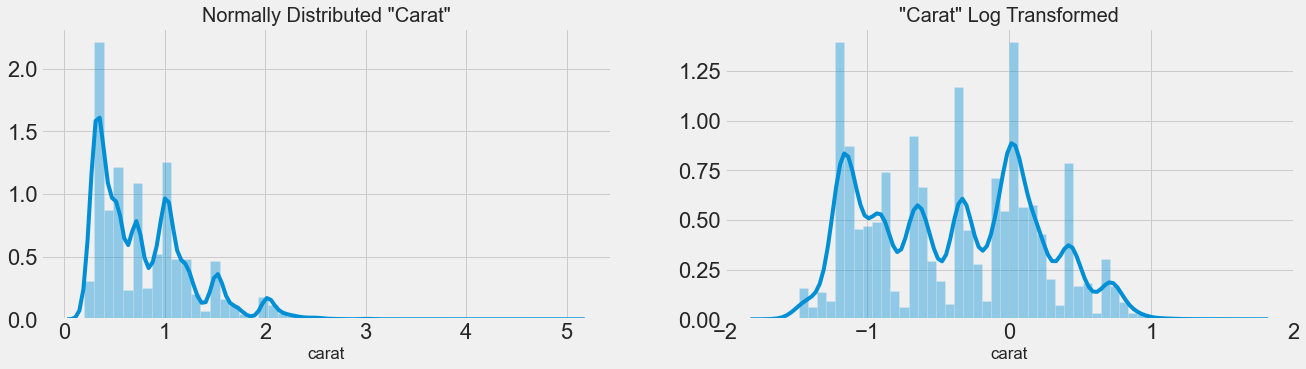

In [10]:
# np log carat because it seemed like an exponential distribution. Now it looks more normal.
import matplotlib.style as style # import to change style

style.use('fivethirtyeight')

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df.carat)
plt.title(fontsize=20, label='Normally Distributed "Carat"')

plt.subplot(1,2,2)
sns.distplot(np.log(df.carat))
plt.title(fontsize=20, label='"Carat" Log Transformed')

;

#therefore we will keep log transform carat
df['carat'] = np.log(df.carat)

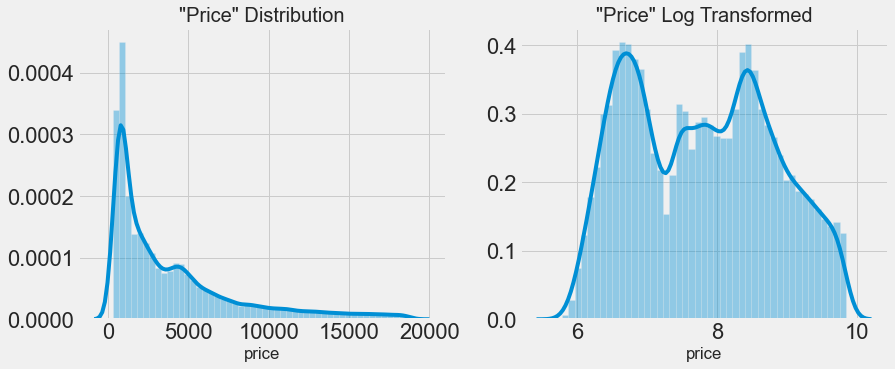

In [14]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.distplot(df.price)
plt.title(fontsize=20, label='"Price" Distribution');
plt.subplot(1,3,2)
sns.distplot(np.log(df.price))
plt.title(fontsize=20, label='"Price" Log Transformed')

style.use('fivethirtyeight');

#therefore we will log transform price
df['price'] = np.log(df.price)



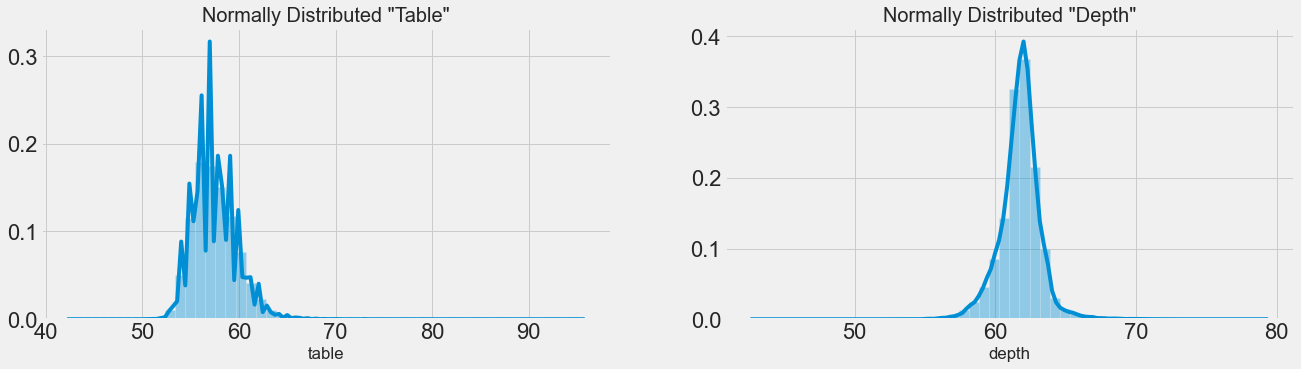

In [15]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df.table)
plt.title(fontsize=20, label='Normally Distributed "Table"')

plt.subplot(1,2,2)
sns.distplot(df.depth)
plt.title(fontsize=20, label='Normally Distributed "Depth"');

## 2. Testing Normality

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~carat
-------------------------------------------------------------------------------------


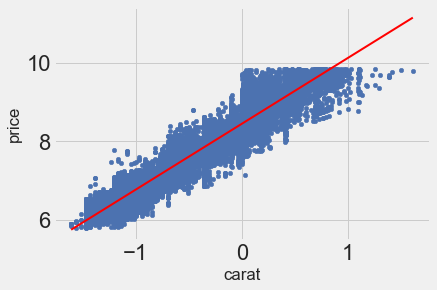

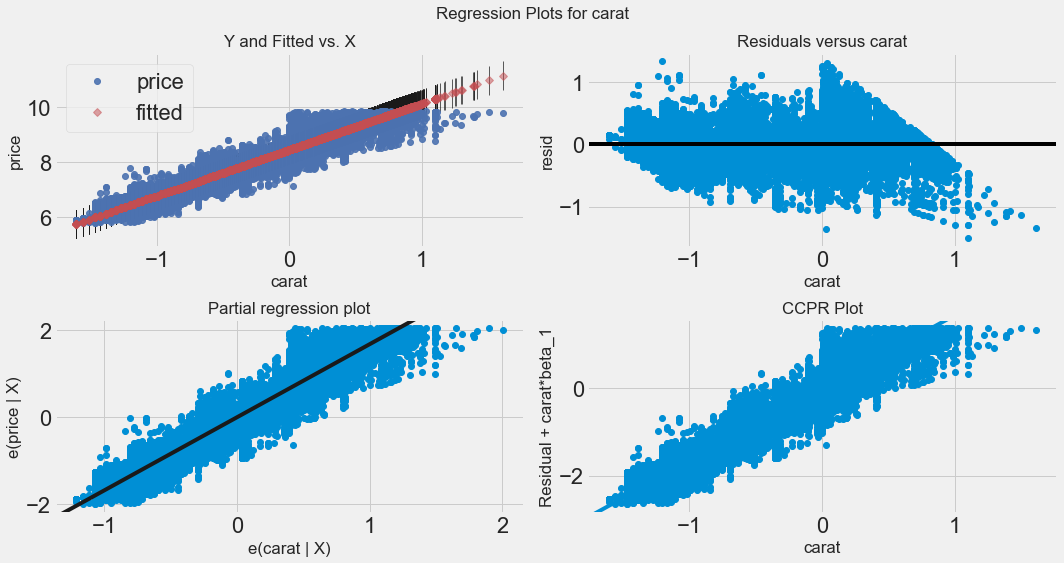

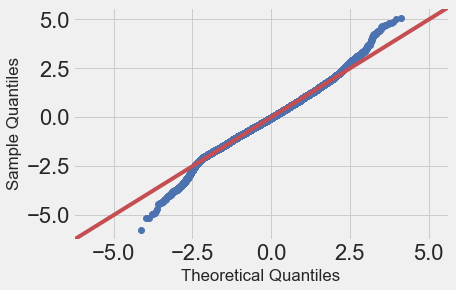

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~depth
-------------------------------------------------------------------------------------


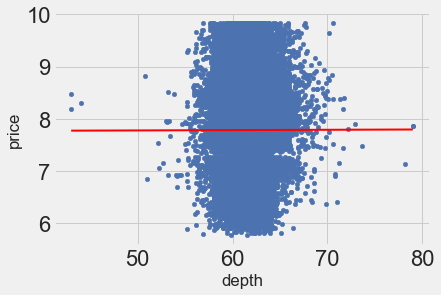

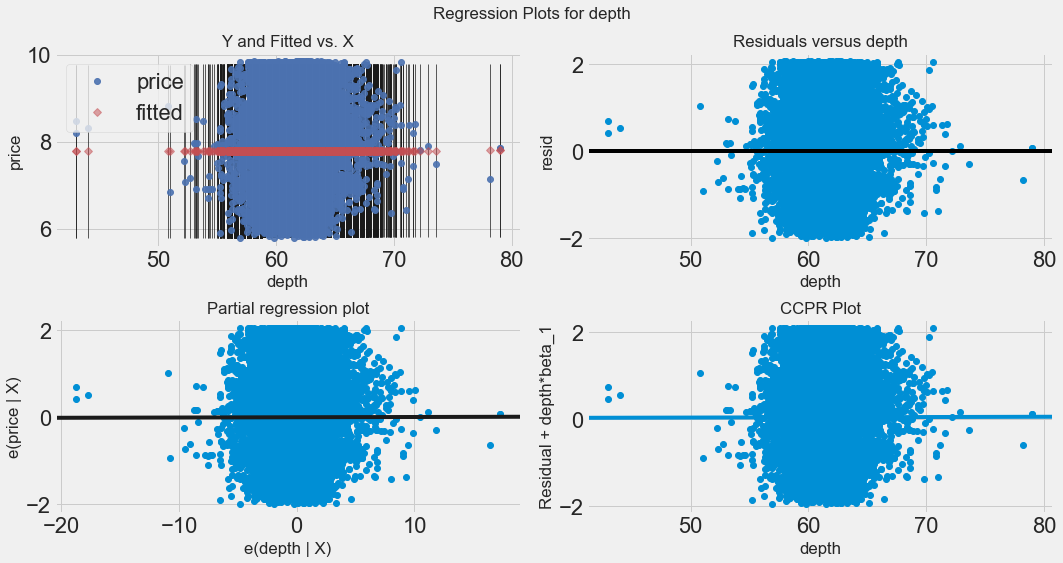

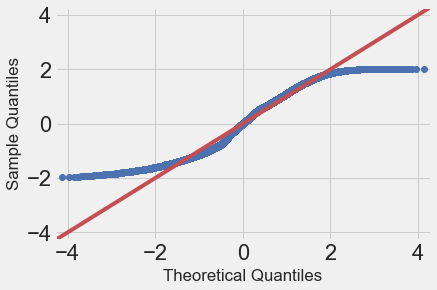

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~table
-------------------------------------------------------------------------------------


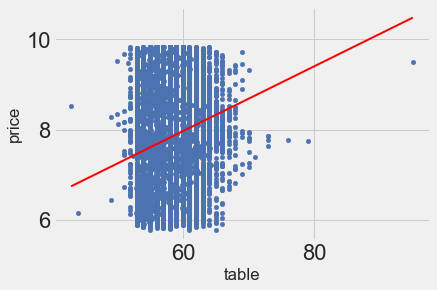

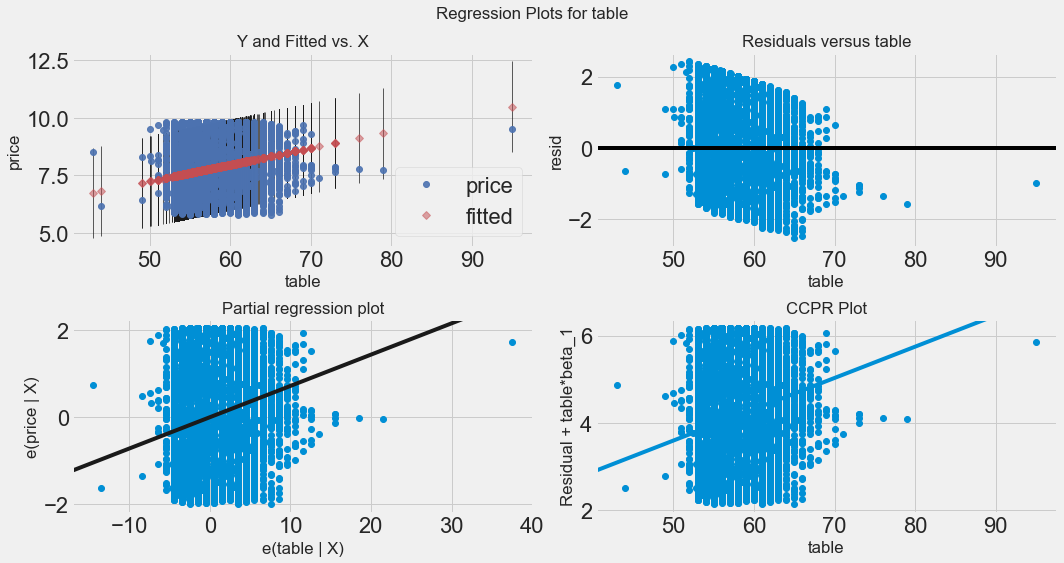

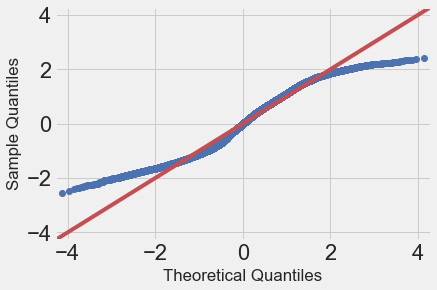

Press Enter to continue...


In [38]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms



results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['carat', 'depth', 'table']):
    print ("Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
#   
    model = smf.ols(formula=f, data=df).fit()
    
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    df.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")

In [39]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,carat,0.932989,8.44866,1.67582,0,1679.88
2,depth,7.39789e-07,7.74915,0.00060917,0.841672,2822.48
3,table,0.0250297,3.65905,0.0718399,2.78414e-299,2436.76


## Creating Dummy Variables for Categorical Columns

In [16]:
#create dummy variables for categorical data
cut_dummies = pd.get_dummies(df.cut, prefix='cut', drop_first=True)
color_dummies = pd.get_dummies(df.color, prefix='col', drop_first=True)
clarity_dummies = pd.get_dummies(df.clarity, prefix='clar', drop_first=True)

#now we can drop the columns we originally had
df.drop(['cut','color','clarity'], axis = 1, inplace = True)

In [17]:
#concat dummy df to the main df 
df1 = pd.concat([df, cut_dummies, color_dummies, clarity_dummies], axis=1)

## Running a Practice/Baseline Model

In [18]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# set x and y variables
X = df1.drop(columns='price')
y = np.log(df1['price'])
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [19]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.769e+06
Date:                Thu, 26 Mar 2020   Prob (F-statistic):                        0.00
Time:                        16:04:17   Log-Likelihood:                          80552.
No. Observations:               40455   AIC:                                 -1.611e+05
Df Residuals:                   40435   BIC:                                 -1.609e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat             0.2393      0.000    738.847      0.000       0.239       0.240
depth             0.0199   6.09e-05    326.981      0.000       0.020       0.020
table             0.0126   6.46e-05    194.840      0.000       0.012       0.013
cut_Good          0.0522      0.001     47.627      0.000       0.050       0.054
cut_Ideal         0.1087      0.001    110.499      0.000       0.107       0.111
cut_Premium       0.0805      0.001     79.823      0.000       0.079       0.083
cut_Very Good     0.0757      0.001     74.789      0.000       0.074       0.078
col_E            -0.0041      0.001     -6.825      0.000      -0.005      -0.003
col_F            -0.0085      0.001    -13.957      0.000      -0.010      -0.007
col_G            -0.0195      0.001    -32.558      0.000      -0.021      -0.018
col_H            -0.0332      0.001    -52.150      0.000      -0.034      -0.032
col_I            -0.0506      0.001    -70.973      0.000      -0.052      -0.049
col_J            -0.0680      0.001    -77.670      0.000      -0.070      -0.066
clar_IF           0.1788      0.002    104.571      0.000       0.175       0.182
clar_SI1          0.1044      0.001     71.737      0.000       0.102       0.107
clar_SI2          0.0850      0.001     58.071      0.000       0.082       0.088
clar_VS1          0.1349      0.001     90.851      0.000       0.132       0.138
clar_VS2          0.1243      0.001     85.013      0.000       0.121       0.127
clar_VVS1         0.1619      0.002    102.810      0.000       0.159       0.165
clar_VVS2         0.1517      0.002     99.047      0.000       0.149       0.155
==============================================================================
Omnibus:                     6685.553   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59655.930
Skew:                           0.534   Prob(JB):                         0.00
Kurtosis:                       8.852   Cond. No.                     1.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Practice Predictions vs Train Set
df_test = pd.DataFrame({'Actual': y_train, 'Predicted': predictions}) 
df_test

,Actual,Predicted
36946,1.819974,1.830044
36833,1.926262,1.926018
39060,1.940773,1.923026
39212,1.941855,1.984521
15923,2.170086,2.177209
...,...,...
27640,2.285308,2.249532
14501,2.160491,2.135360
30727,1.887872,1.875054
47323,1.836235,1.850274


In [21]:
y_pred = model.predict(X_test)

In [22]:
# Train vs Actual
df_test2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df_test

,Actual,Predicted
36946,1.819974,1.830044
36833,1.926262,1.926018
39060,1.940773,1.923026
39212,1.941855,1.984521
15923,2.170086,2.177209
...,...,...
27640,2.285308,2.249532
14501,2.160491,2.135360
30727,1.887872,1.875054
47323,1.836235,1.850274


In [23]:
# printing out metrics
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.024878173492201738
Mean Squared Error: 0.0010767382723103174
Root Mean Squared Error: 0.032813690318376526


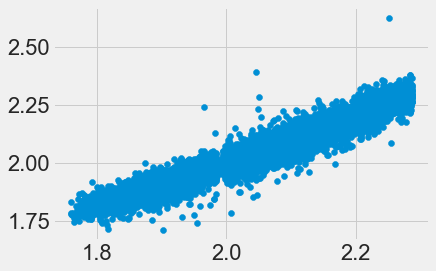

In [34]:
# plotting out how well we did
# looks like we're okay until we get toward the end
plt.scatter(y_test,y_pred)

In [28]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9378785559233025

## Running model with log transformed Variables

In [ ]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# set x and y variables
X = df1.drop(columns='price')
y = df1['price']
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) # make the predictions by the model
# Print out the statistics
model.summary()